In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [46]:
df=pd.read_csv('redwine_quality.csv')

In [47]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
df.shape

(1599, 12)

In [49]:
#finding null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [50]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [51]:
#Checking the mean counts of all the columns grouping by quality
df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].groupby(['quality'],as_index=False).mean().sort_values(by='quality', ascending=True)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
2,5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
3,6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
4,7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
5,8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


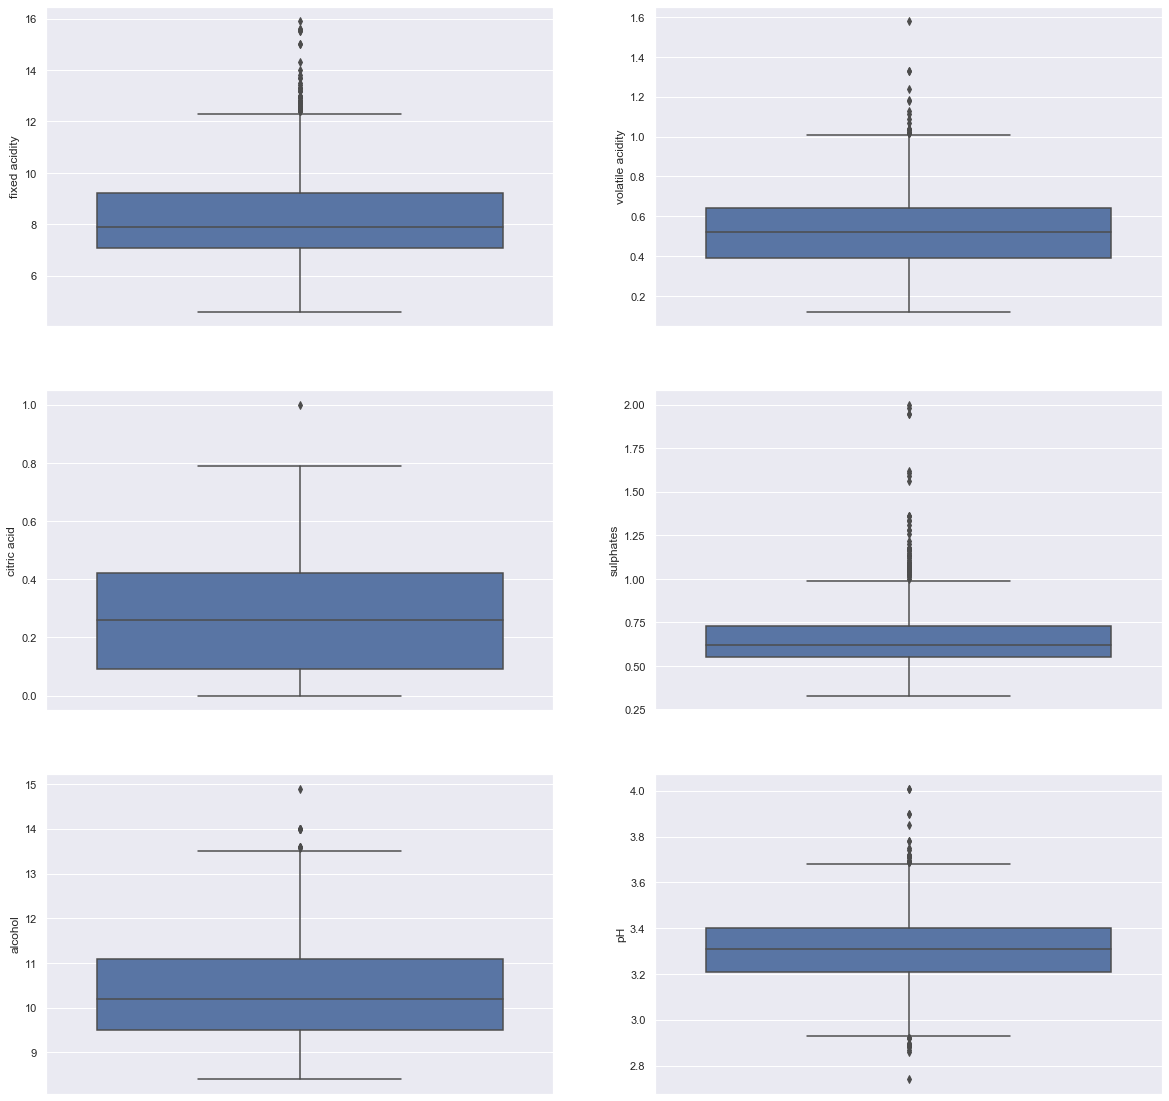

In [52]:
#visualizing outliers 
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 20)
sns.boxplot(x='fixed acidity',hue='quality',orient='v',data=df,ax=axes[0][0])
sns.boxplot(x='volatile acidity',hue='quality',orient='v',data=df,ax=axes[0][1])
sns.boxplot(x='citric acid',hue='quality',orient='v',data=df,ax=axes[1][0])
sns.boxplot(x='sulphates',hue='quality',orient='v',data=df,ax=axes[1][1])
sns.boxplot(x='alcohol',hue='quality',orient='v',data=df,ax=axes[2][0])
sns.boxplot(x='pH',hue='quality',orient='v',data=df,ax=axes[2][1])



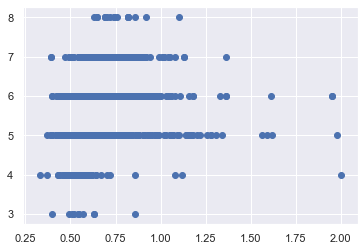

In [53]:
plt.scatter(x='sulphates',y='quality',data=df)

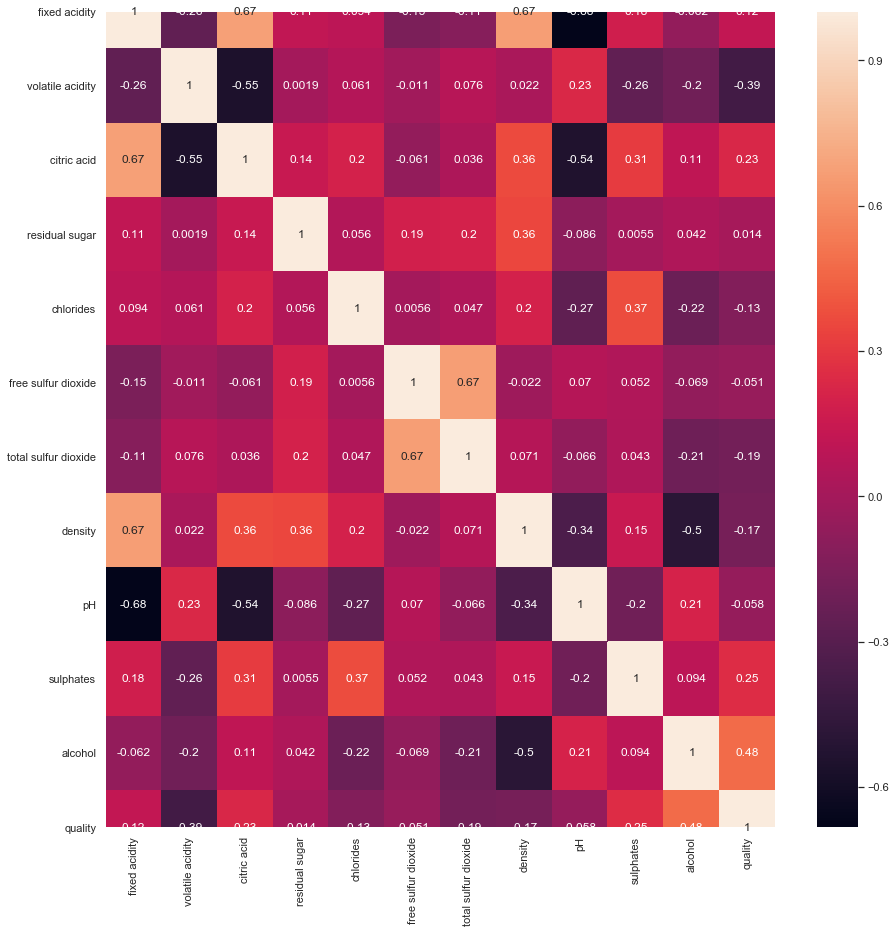

In [54]:
hmap=df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(hmap,ax=ax,annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B551386648>,
      dtype=object)

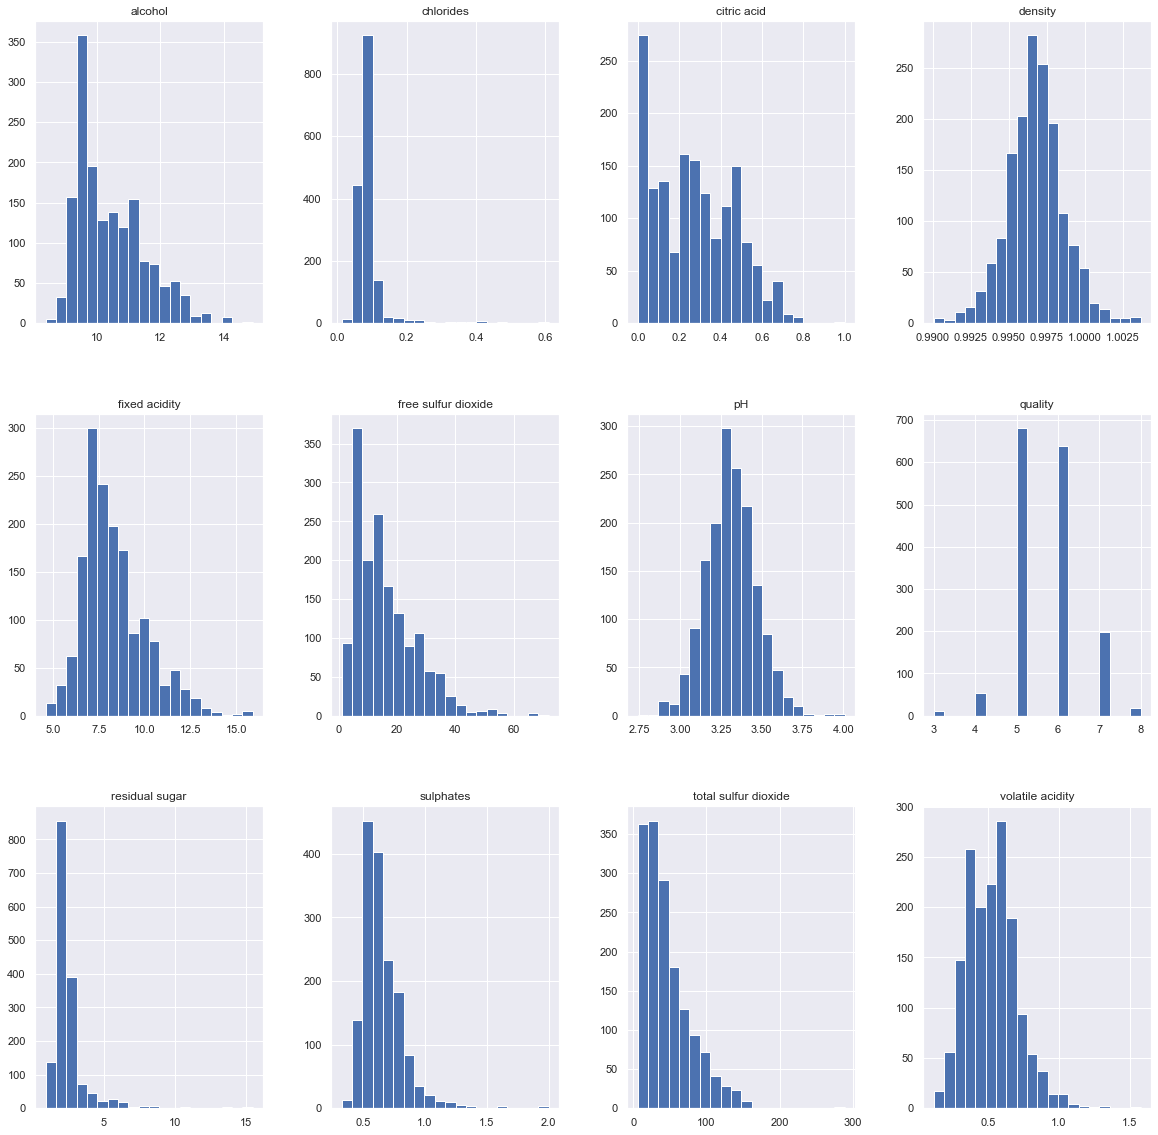

In [55]:
df.hist(figsize=(20,20),grid=True,layout=(3,4),bins=20)

In [56]:
#Checking Skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [57]:
# having low correlation and will not much impact the data
df=df.drop(['residual sugar','free sulfur dioxide','total sulfur dioxide'],axis=1)

In [58]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.076,0.9978,3.51,0.56,9.4,5


In [59]:
#to reduce the skewness
df['chlorides']=np.cbrt(df['chlorides'])
df['chlorides']=np.log(df['chlorides'])


(array([  2.,   0.,   7., 109., 951., 450.,  36.,  22.,  11.,  11.]),
 array([-1.47428288, -1.34327653, -1.21227019, -1.08126385, -0.9502575 ,
        -0.81925116, -0.68824481, -0.55723847, -0.42623213, -0.29522578,
        -0.16421944]),
 <a list of 10 Patch objects>)

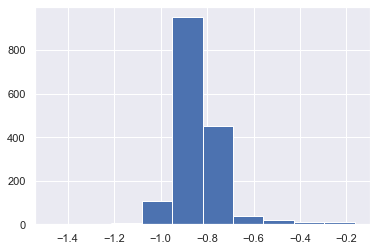

In [60]:

plt.hist(df['chlorides'])

(array([  9.,  82., 389., 562., 343., 150.,  37.,  19.,   4.,   4.]),
 array([-1.10866262, -0.92848164, -0.74830066, -0.56811968, -0.3879387 ,
        -0.20775772, -0.02757674,  0.15260424,  0.33278522,  0.5129662 ,
         0.69314718]),
 <a list of 10 Patch objects>)

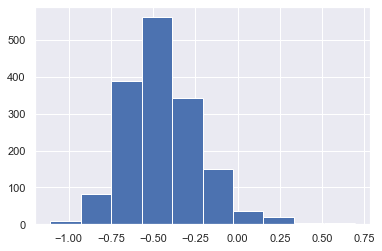

In [61]:
df['sulphates']=np.log(df['sulphates'])
plt.hist(df['sulphates'])

In [64]:
df['sulphates'].skew()

0.9218673620869906

In [65]:
df['chlorides'].skew()

1.7452154426856807

In [66]:
df.isnull().sum()

fixed acidity       0
volatile acidity    0
citric acid         0
chlorides           0
density             0
pH                  0
sulphates           0
alcohol             0
quality             0
dtype: int64

In [67]:
#classification of target variable to 0 & 1
df['quality'] = np.where(df['quality'] <=5,0,1)



In [68]:
from scipy.stats import zscore

In [69]:
z=np.abs(zscore(df))
df[(z>=3).all(axis=1)]

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,quality


In [70]:
#removing the outliers
df=df[(z<3).all(axis=1)]

In [71]:
df.shape

(1509, 9)

In [72]:
x=df.iloc[:,:8]
x.head()



,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,-0.859007,0.9978,3.51,-0.579818,9.4
1,7.8,0.88,0.00,-0.774263,0.9968,3.20,-0.385662,9.8
2,7.8,0.76,0.04,-0.795322,0.9970,3.26,-0.430783,9.8
3,11.2,0.28,0.56,-0.863422,0.9980,3.16,-0.544727,9.8
4,7.4,0.70,0.00,-0.859007,0.9978,3.51,-0.579818,9.4


In [73]:
y=df.iloc[:,8:9]
y.head()

,quality
0,0
1,0
2,0
3,1
4,0


In [74]:
df['quality'].value_counts()

1    807
0    702
Name: quality, dtype: int64

In [75]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit_transform(x)



array([[0.28235294, 0.63043478, 0.        , ..., 0.72413793, 0.40446553,
        0.19230769],
       [0.32941176, 0.82608696, 0.        , ..., 0.36781609, 0.55295808,
        0.26923077],
       [0.32941176, 0.69565217, 0.05063291, ..., 0.43678161, 0.5184495 ,
        0.26923077],
       ...,
       [0.15294118, 0.42391304, 0.16455696, ..., 0.62068966, 0.62789452,
        0.5       ],
       [0.10588235, 0.57065217, 0.15189873, ..., 0.79310345, 0.58597661,
        0.34615385],
       [0.11764706, 0.20652174, 0.59493671, ..., 0.5862069 , 0.53012622,
        0.5       ]])

In [76]:
x=pd.DataFrame(data=x,columns=x.columns)
x.head()

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,-0.859007,0.9978,3.51,-0.579818,9.4
1,7.8,0.88,0.00,-0.774263,0.9968,3.20,-0.385662,9.8
2,7.8,0.76,0.04,-0.795322,0.9970,3.26,-0.430783,9.8
3,11.2,0.28,0.56,-0.863422,0.9980,3.16,-0.544727,9.8
4,7.4,0.70,0.00,-0.859007,0.9978,3.51,-0.579818,9.4


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1056, 8)
(453, 8)
(1056, 1)
(453, 1)


In [78]:
#applying logistic regresssion and finding out the best random state for best accuracy score 
max_ascore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    a_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state,"is:",a_scr)
    if a_scr>max_ascore:
        max_ascore=a_scr
        final_r_state=r_state
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_ascore)
    

accuracy_score corresponding to random state: 42 is: 0.7505518763796909
accuracy_score corresponding to random state: 43 is: 0.7284768211920529
accuracy_score corresponding to random state: 44 is: 0.7350993377483444
accuracy_score corresponding to random state: 45 is: 0.7637969094922737
accuracy_score corresponding to random state: 46 is: 0.7064017660044151
accuracy_score corresponding to random state: 47 is: 0.7615894039735099
accuracy_score corresponding to random state: 48 is: 0.6710816777041942
accuracy_score corresponding to random state: 49 is: 0.7262693156732892
accuracy_score corresponding to random state: 50 is: 0.7240618101545254
accuracy_score corresponding to random state: 51 is: 0.7130242825607064
accuracy_score corresponding to random state: 52 is: 0.7439293598233996
accuracy_score corresponding to random state: 53 is: 0.7549668874172185
accuracy_score corresponding to random state: 54 is: 0.7373068432671082
accuracy_score corresponding to random state: 55 is: 0.728476821

In [79]:
#using GridSearchCV to find the best parameters for RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
model=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}

grid_search = GridSearchCV(model, params, cv = 3)

In [80]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [81]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)
        
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.9839015151515151
The F1 Score is: 0.9839182782534429
The score is: 0.8145695364238411
The F1 Score is: 0.8145966461407382


In [83]:
#using GridSearchCV to find the best parameters for Support Vector Classifier
model_new=SVC(kernel='rbf')
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid1_search = GridSearchCV(model_new, param_grid, cv=3)


In [84]:
grid1_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
grid1_search.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
model_new = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model_new.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model_new.predict(x)
    score = model_new.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8418560606060606
The F1 Score is: 0.8417569108007978
The score is: 0.7461368653421634
The F1 Score is: 0.7460253506772577


In [87]:
#further check and found that the Random forest Classifier is giving te best results

In [88]:
from sklearn.externals import joblib
joblib.dump(model,'redwine_quality_classification.pkl')

['redwine_quality_classification.pkl']